In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.figure import Figure
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

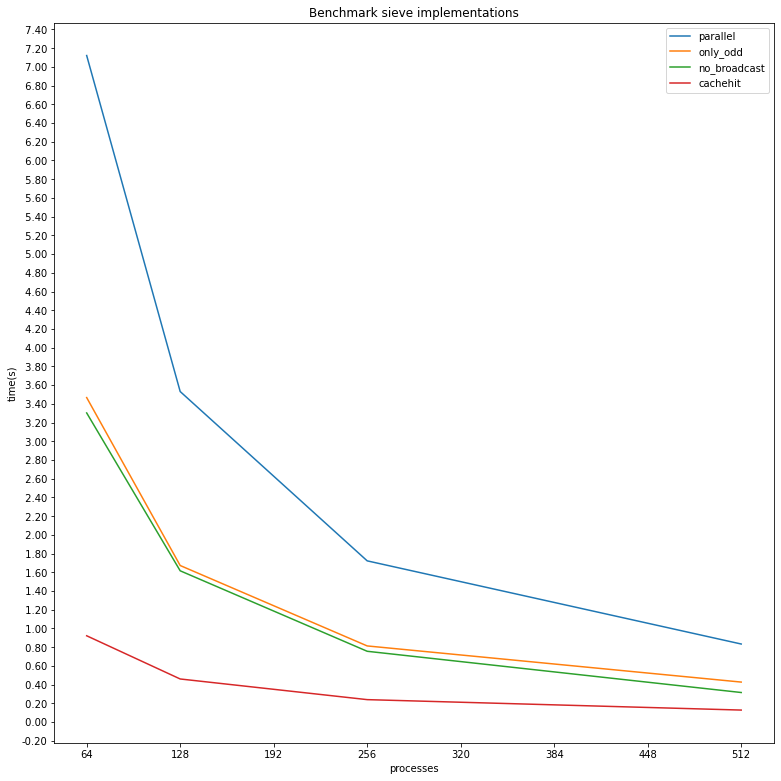

In [53]:
# ypoints1 = np.array([7.121486, 3.466678, 3.302563, 0.921523])
# ypoints2 = np.array([3.531183, 1.672209, 1.615805, 0.459895])
# ypoints3 = np.array([1.721986, 0.812992, 0.755818, 0.239177])
# ypoints4 = np.array([0.833410, 0.426704, 0.315242, 0.127623])

x1 = np.array([64, 128, 256, 512])
y1 = np.array([7.121486, 3.531183, 1.721986, 0.833410])
y2 = np.array([3.466678, 1.672209, 0.812992, 0.426704])
y3 = np.array([3.302563, 1.615805, 0.755818, 0.315242])
y4 = np.array([0.921523, 0.459895, 0.239177, 0.127623])
fig = plt.figure(figsize =(10, 10)) 
ax = fig.add_axes([1, 1, 1, 1])
ax.set_ylim(0, 8, auto=True)
ax.set_xlim(0, 550, auto=True)
ax.plot(x1, y1)
ax.plot(x1, y2)
ax.plot(x1, y3)
ax.plot(x1, y4)
ax.set_xlabel("processes")
ax.set_ylabel("time(s)")

ax.xaxis.set_major_locator(MultipleLocator(64))

ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.2f'))

plt.legend(["parallel", "only_odd", "no_broadcast", "cachehit"])
plt.title("Benchmark sieve implementations")
plt.show()